<a href="https://colab.research.google.com/github/deiveleal/Data/blob/main/mestrado/ft105/classificacao/ClassificationWithDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FT105A - Tópico Interdisciplinar I: Introdução ao Aprendizado de Máquina
### Aluno: Deive Audieres Leal
### RA: 083423


### Tarefa 1: Árvores de Decisão

#### Link para o repositório: [https://github.com/deiveleal/Data/blob/main/mestrado/ft105/classificacao/ClassificationWithDecisionTree](https://github.com/deiveleal/Data/blob/main/mestrado/ft105/classificacao/ClassificationWithDecisionTree.ipynb)

In [1]:
# Instala as bibliotecas da UCI, graphviz e pydotplus
!pip install ucimlrepo
!pip install graphviz
!pip install pydotplus

#### Importação das bibliotecas

In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from six import StringIO
from IPython.display import Image
import pydotplus


#### Importa o conjunto de dados

In [3]:
# Importa o repositório do conjunto de dados
from ucimlrepo import fetch_ucirepo

# Realiza a busca dos dados
wine = fetch_ucirepo(id=109)

# Os dados são um dataframe pandas já separado em features e targets
X = wine.data.features
y = wine.data.targets

# Mostra o dataframe montado
df = pd.concat([X,y], axis=1)
df.head(7)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1


## Classificação com Árvore de Decisão

#### Primeira execução

In [4]:
# Separa o dataset em 80% de treino e 20% de teste, de forma randomica e com
# embaralhamento, foi utilizado o valor 52 no random_state como semente, para que
# ao alterar o mesmo na próxima execução, os valores escolhidos para treino e teste
# sejam diferentes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=52
    )

In [5]:
# Visualiza as 7 primeiras linhas para confirmar as diferenças entre os
# registros selecionados.
X_train.head(7)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
153,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
21,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
24,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
113,11.41,0.74,2.50,21.0,88,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434
146,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415


In [6]:
# Cria o modelo de árvore de decisão. Foram usados os parâmetros padrões
# com exceção do criterio que passei a utilizar o 'log_loss' como ganho
# da informação ao invés do padrão gini
clf = tree.DecisionTreeClassifier(criterion='log_loss')

# Treina o classificador
clf = clf.fit(X_train,y_train)

# Prediz a resposta
y_pred = clf.predict(X_test)


In [7]:
# Acurácia do modelo! O quanto ele acertou?
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))


Acurácia: 0.9166666666666666


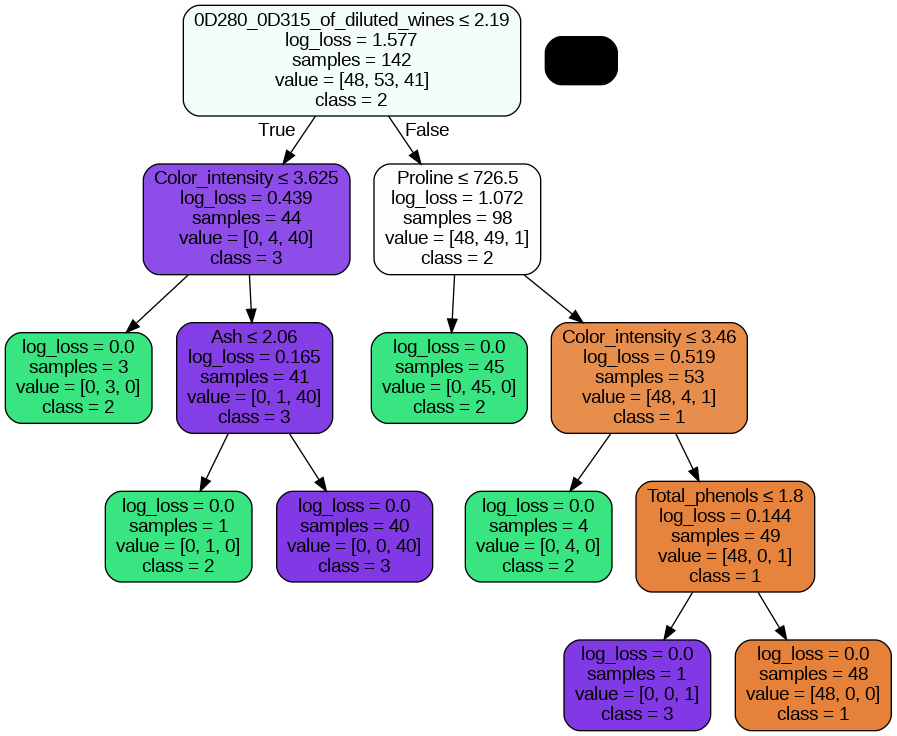

In [8]:
# Visualização da árvore de classificação
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns, class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Segunda execução

In [9]:
# Novamente separei o dataset em 80% de treino e 20% de teste, de forma randomica e com
# embaralhamento, foi utilizado o valor 25 no random_state como semente, para que
# os valores escolhidos para treino e teste sejam diferentes da execução anterior.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=25
    )

In [10]:
# Visualiza as 7 primeiras linhas para confirmar as diferenças entre os
# registros selecionados e a execução anterior.
X_train.head(7)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
10,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
49,13.94,1.73,2.27,17.4,108,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380
82,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630
54,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060


In [11]:
# Cria o modelo de árvore de decisão. Mantive os mesmos parâmetros padronizados
# com exceção do criterio que utilizo o 'log_loss' como ganho
# da informação ao invés do padrão gini
clf = tree.DecisionTreeClassifier(criterion='log_loss')

# Treina o classificador
clf = clf.fit(X_train,y_train)

# Prediz a resposta
y_pred = clf.predict(X_test)


In [12]:
# Acurácia do modelo! O quanto ele acertou?
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))


Acurácia: 0.9722222222222222


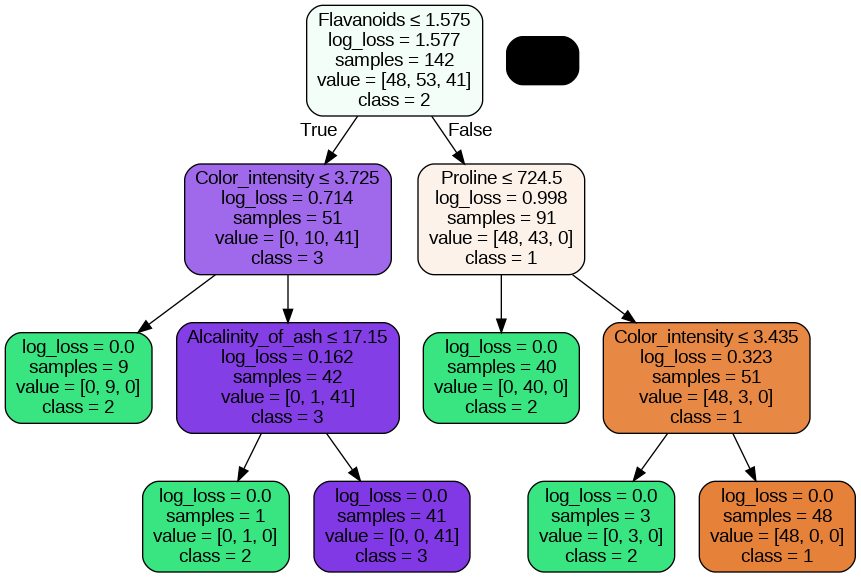

In [13]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns, class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wine.png')
Image(graph.create_png())

Com o segundo treinamento houve um ganho de acurácia. Porém, como pode haver variação entre os resultados, idealmente deveriam ser feitas mais algumas rodadas de teste e então tirar a média da acurácia, garantindo uma melhor previsão.

Com relação ao modelo, tentei usar uma que se aproxima ao mostrado em sala de aula. Assim, ao verificar os tipos disponíveis na biblioteca sklearn do python, encontramos que a biblioteca utiliza uma versão otimizada do CART. Que por sua vez foi mostrado em sala de aula. CART constrói árvores binárias usando o recurso e o limite que produzem o maior ganho de informação em cada nó. Na execução notamos que a árvore tem uma construção binária.